In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
#Filter method
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest with chi2
select_k_best = SelectKBest(score_func=chi2, k=2)
X_train_k_best = select_k_best.fit_transform(X_train, y_train)

print("Selected features:", X_train.columns[select_k_best.get_support()])

Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [5]:
#wrapper Based method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Apply RFE with logistic regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)

print("Selected features:", X_train.columns[rfe.get_support()])

Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


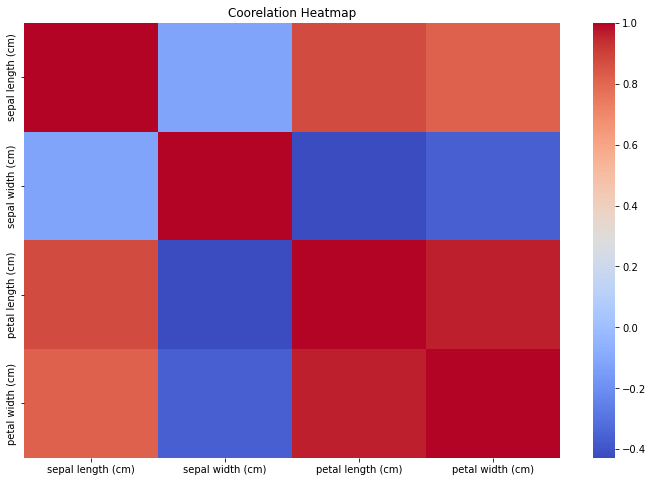

In [6]:
#correlation Heatmap(fillter)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr=X.corr()
sns.heatmap(corr,annot=False,cmap='coolwarm')
plt.title("Coorelation Heatmap")
plt.show()